In [ ]:
!git clone https://github.com/matrix215/deepface.git

Cloning into 'deepface'...
remote: Enumerating objects: 4315, done.
remote: Counting objects: 100% (1359/1359), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 4315 (delta 1251), reused 1182 (delta 1174), pack-reused 2956
Receiving objects: 100% (4315/4315), 49.82 MiB | 16.29 MiB/s, done.
Resolving deltas: 100% (2736/2736), done.


In [ ]:
%cd deepface

/content/deepface


In [ ]:
!pip install -e .

Obtaining file:///content/deepface
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 9.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=6fe7198b4c5efd9ec44c8b3edc3e4f84cc66bc994b87fcc259f5a903a7d46b88
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
  Running setup.py develop for deepface


In [ ]:
from deepface import DeepFace

Directory  /root /.deepface created
Directory  /root /.deepface/weights created


In [ ]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 얼굴 감지 실패한 이미지 찾기. 안해도 됨

import os
from tqdm import tqdm
from deepface import DeepFace

# 디렉토리 경로 설정
base_dir = '/content/drive/MyDrive/dataset/aihub/aihub/'

# 모든 디렉토리를 반복하며 이미지 파일 경로 수집
image_paths = []

for dir_path, _, file_names in os.walk(base_dir):
    for file_name in file_names:
        if file_name.lower().endswith('.jpg'):
            image_paths.append(os.path.join(dir_path, file_name))

# 얼굴 감지 실패한 이미지 찾기
failed_detection_images = []

for img_path in tqdm(image_paths, desc="Processing images"):
    try:
        face_detected = DeepFace.extract_faces(img_path, detector_backend='dlib')
        if face_detected is None:
            failed_detection_images.append(img_path)
    except Exception as e:
        print(f"Error processing {img_path}: {str(e)}")

# 얼굴 감지가 실패한 이미지 출력
if failed_detection_images:
    print("Failed to detect face in the following images:")
    for img_path in failed_detection_images:
        print(img_path)
else:
    print("All images were successfully detected.")


KeyboardInterrupt: ignored

In [ ]:
import os
import random
from tqdm import tqdm

# 디렉토리 경로 설정
base_dir = '/content/drive/MyDrive/dataset/aihub/aihub/'

# 이미지 파일 경로 수집
image_paths = []

for dir_path, _, file_names in os.walk(base_dir):
    for file_name in file_names:
        if file_name.lower().endswith('.jpg'):
            image_paths.append(os.path.join(dir_path, file_name))

# 이미지 쌍을 생성하고 클래스 레이블을 할당하는 함수
def generate_image_pairs(image_paths, num_pairs):
    image_pairs = []

    for _ in range(num_pairs):
        # 랜덤하게 한 명의 사람을 선택
        person_dir = random.choice(image_paths)

        # 해당 사람의 이미지 리스트 생성
        person_images = [img for img in image_paths if os.path.dirname(img) == os.path.dirname(person_dir)]

        # positive pair 생성
        img1, img2 = random.sample(person_images, 2)
        image_pairs.append((img1, img2, 0))  # 클래스 레이블 0은 positive pair를 나타냅니다.

        # negative pair 생성
        other_people = [img for img in image_paths if os.path.dirname(img) != os.path.dirname(person_dir)]
        img1, img2 = random.sample(other_people, 2)
        image_pairs.append((img1, img2, 1))  # 클래스 레이블 1은 negative pair를 나타냅니다.

    return image_pairs

# 딕셔너리로 결과 저장
results = []

# 이미지 쌍 생성 및 클래스 레이블 할당
num_pairs = 400  # 각각 400개의 positive 및 negative pair를 생성
image_pairs = generate_image_pairs(image_paths, num_pairs)

# DeepFace.verify를 이용하여 벡터 간 거리 계산
for idx, pair in enumerate(tqdm(image_pairs), start=1):
    img1, img2, class_label = pair

    # 이미지 간 거리 계산
    result = DeepFace.verify(img1, img2, model_name='VGG-Face', detector_backend='dlib', distance_metric='euclidean_l2')
    distance = result['distance']

    # 결과를 리스트에 저장
    results.append({'distance': distance, 'class_label': class_label})

print("All pairs processed.")


  0%|          | 0/800 [00:00<?, ?it/s]

shape_predictor_5_face_landmarks.dat.bz2 is going to be downloaded


Downloading...
From: http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
To: /root/.deepface/weights/shape_predictor_5_face_landmarks.dat.bz2

  0%|          | 0.00/5.71M [00:00<?, ?B/s]
  9%|▉         | 524k/5.71M [00:00<00:08, 577kB/s]
 18%|█▊        | 1.05M/5.71M [00:01<00:04, 1.02MB/s]
 28%|██▊       | 1.57M/5.71M [00:01<00:03, 1.37MB/s]
 37%|███▋      | 2.10M/5.71M [00:01<00:02, 1.63MB/s]
 46%|████▌     | 2.62M/5.71M [00:01<00:01, 1.83MB/s]
100%|██████████| 5.71M/5.71M [00:02<00:00, 2.72MB/s]


vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://drive.google.com/uc?id=1fJQtAr3g8PUBP51y_fXNNOmXh_VpAelU
To: /root/.deepface/weights/vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  1%|          | 4.72M/580M [00:00<00:13, 43.9MB/s]
  3%|▎         | 18.9M/580M [00:00<00:05, 98.2MB/s]
  5%|▍         | 28.8M/580M [00:00<00:06, 91.2MB/s]
  7%|▋         | 38.3M/580M [00:00<00:07, 74.8MB/s]
  8%|▊         | 46.7M/580M [00:00<00:09, 58.7MB/s]
 11%|█         | 64.0M/580M [00:00<00:05, 86.4MB/s]
 14%|█▎        | 79.7M/580M [00:00<00:04, 104MB/s] 
 16%|█▌        | 91.8M/580M [00:01<00:04, 107MB/s]
 18%|█▊        | 105M/580M [00:01<00:04, 115MB/s] 
 20%|██        | 118M/580M [00:01<00:04, 104MB/s]
 22%|██▏       | 129M/580M [00:01<00:04, 105MB/s]
 24%|██▍       | 141M/580M [00:01<00:06, 63.5MB/s]
 26%|██▌       | 152M/580M [00:02<00:08, 52.8MB/s]
 29%|██▉       | 168M/580M [00:02<00:06, 64.6MB/s]
 32%|███▏      | 185M/580M [00:02<00:05, 71.3MB/s]
 35%|███▍      | 202M/580M [00:02<00:04, 84.6MB/s]
 

All pairs processed.


In [ ]:
results

[]

In [ ]:
# 안해도 됨

import pandas as pd
# 결과 데이터를 DataFrame으로 변환
df = pd.DataFrame(results)

# CSV 파일로 저장
csv_filename = '/content/drive/MyDrive/result.csv'
df.to_csv(csv_filename, index=False)

In [ ]:
# 안해도 됨

df = pd.read_csv('/content/drive/MyDrive/result.csv')

In [ ]:
# 안해도 됨

# class가 0이고 distance가 9 이상인 행 제거
df = df.drop(df[(df['class_label'] == 0) & (df['distance'] >= 9)].index)

# class가 1이고 distance가 5 이하인 행 제거
df = df.drop(df[(df['class_label'] == 1) & (df['distance'] <= 5)].index)

In [ ]:
# 안해도 됨

results = df.to_dict(orient='records')

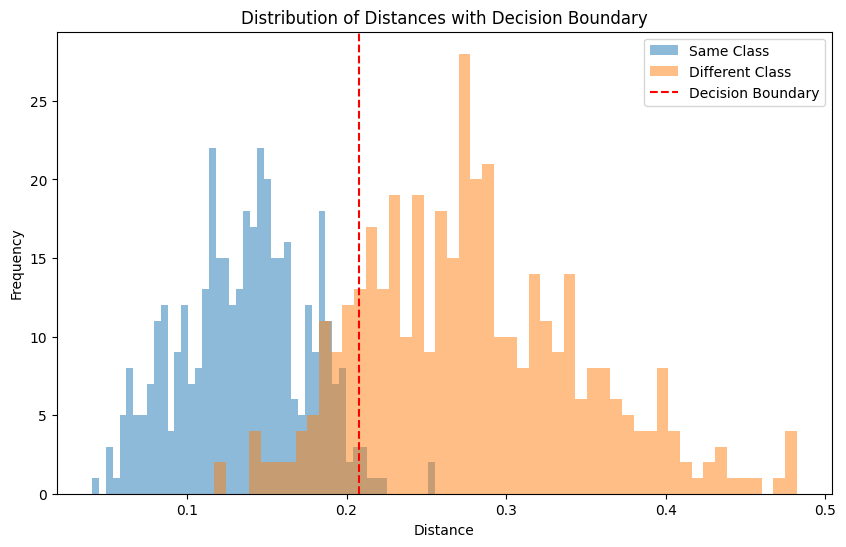

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 결과에서 거리와 클래스 정보 추출
distances = [result['distance'] for result in results]
class_labels = [result['class_label'] for result in results]

# 클래스별로 거리를 저장할 리스트 생성
same_class_distances = []
different_class_distances = []

# 클래스 별로 거리 분류
for i in range(len(results)):
    if class_labels[i] == 0:
        same_class_distances.append(distances[i])
    else:
        different_class_distances.append(distances[i])

# 클래스 별 거리 평균 계산
avg_same_class_distance = np.mean(same_class_distances)
avg_different_class_distance = np.mean(different_class_distances)

# 결정 경계 설정 (평균 거리의 중간값)
decision_boundary = (avg_same_class_distance + avg_different_class_distance) / 2

# 결과 시각화
plt.figure(figsize=(10, 6))

plt.hist(same_class_distances, bins=50, alpha=0.5, label='Same Class')
plt.hist(different_class_distances, bins=50, alpha=0.5, label='Different Class')

plt.axvline(x=decision_boundary, color='r', linestyle='--', label='Decision Boundary')

plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distances with Decision Boundary')
plt.legend()

plt.show()


Accuracy: 0.54375


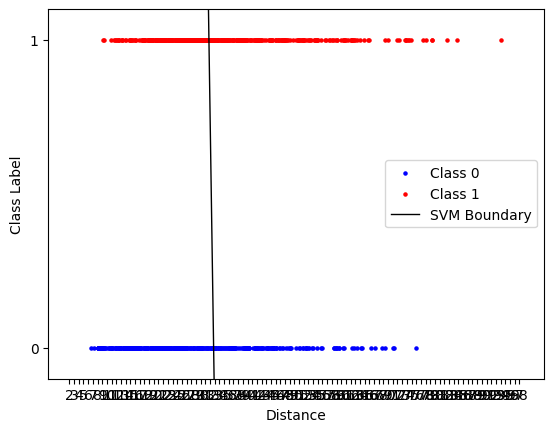

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 결과 데이터를 numpy 배열로 변환
data = np.array([(entry['distance'], entry['class_label']) for entry in results])

# 특성과 레이블 분리
X = data[:, 0].reshape(-1, 1)  # distance
y = data[:, 1].astype(int)      # class_label

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 모델 생성
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = clf.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# SVM 모델 시각화
plt.scatter(X[y == 0], y[y == 0], color='blue', s=5, label='Class 0')
plt.scatter(X[y == 1], y[y == 1], color='red', s=5, label='Class 1')

# 결정 경계 플로팅
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 결정 경계 생성
xx = np.linspace(xlim[0], xlim[1])
yy = clf.decision_function(xx.reshape(-1, 1))
a = -clf.coef_[0] / clf.coef_[0][0]
yy = a * xx - (clf.intercept_[0]) / clf.coef_[0][0]

# 결정 경계 플로팅
plt.plot(xx, yy, color='black', linewidth=1, label='SVM Boundary')

# 눈금 설정
plt.xticks(np.arange(int(xlim[0]), int(xlim[1]) + 1, 1))
plt.yticks([0, 1])

plt.xlabel('Distance')
plt.ylabel('Class Label')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()
